<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tensroflow" data-toc-modified-id="Tensroflow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tensroflow</a></span></li><li><span><a href="#Activation-function" data-toc-modified-id="Activation-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Activation function</a></span><ul class="toc-item"><li><span><a href="#문자열" data-toc-modified-id="문자열-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>문자열</a></span></li><li><span><a href="#함수" data-toc-modified-id="함수-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>함수</a></span></li><li><span><a href="#nn-모듈" data-toc-modified-id="nn-모듈-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>nn 모듈</a></span></li><li><span><a href="#layer" data-toc-modified-id="layer-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>layer</a></span><ul class="toc-item"><li><span><a href="#동작-구조-살펴보기" data-toc-modified-id="동작-구조-살펴보기-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>동작 구조 살펴보기</a></span></li></ul></li><li><span><a href="#직접-구현" data-toc-modified-id="직접-구현-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>직접 구현</a></span></li></ul></li></ul></div>

## Tensroflow

In [1]:
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Dense, Flatten

In [3]:
# default 값이 있기 때문에 인자를 안 넣어도 된다.
# 어제는 Layer 인스턴스를 list로 묶어서 인자로 넣었다.
model = Sequential()

In [4]:
layer1 = Dense(64)

In [5]:
# add 방식으로 layer를 추가할 수 있다. 
model.add(layer1)

In [ ]:
# Error
# 첫번째 layer에 input_shape이 없기 때문에 output shape 계산할 수 없기 때문이다.
# 딥러닝은 내부적으로 행렬 계산이므로, 첫번째 shape이 있어야한다.
model.summary()

In [9]:
model = Sequential()
layer1 = Dense(64, input_shape=(28, 28))
model.add(layer1)

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 28, 64)            1856      
Total params: 1,856
Trainable params: 1,856
Non-trainable params: 0
_________________________________________________________________


In [11]:
# add로 계속 레이어를 추가할 수 있다
model.add(Dense(43))

In [12]:
# add할때마다 추가된 내용을 summary로 확인할 수 있다.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 28, 64)            1856      
_________________________________________________________________
dense_3 (Dense)              (None, 28, 43)            2795      
Total params: 4,651
Trainable params: 4,651
Non-trainable params: 0
_________________________________________________________________


**Tensorflow에서 모델 만드는 5가지 방법**
1. Sequential
    1. layers 인자 방법
    2. add 방법
2. Model (Functional API)
3. Model (OOP - Inheritance)
4. Estimator(scikit-learn과 유사)
5. tensor (tf.nn 활용)

남이 만든 코드를 이해하기 위해서, 위 방법들을 모두 알고 있어야 한다.

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 관례상 compile이라는 이름을 사용한다.
# 실제 compile하지는 않는다. theano나 tensorflow 1버전대에서는 실제 compile이 일어나서 이름이 compile이었다.
# tensorflow 1버전대에서는 compile하기 전에는 값을 확인할 수 없었다.
# pytorch의 영향을 받아서 2버전대부터는 중간에 값을 확인할 수 있게 업데이트 되었다.(eager mode)

# acc는 accuracy의 약자
# 문자열로 사용하면, 기본값을 그대로 사용한다.
# 문자열 대신 객체를 사용하면, 세부 옵션을 정할 수 있다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metric=['acc'])

In [21]:
# scikit-learn에서도 객체를 사용해서 세부 옵션을 정하는 방법이 있었다.

from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

data = load_iris()
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_score(KNeighborsClassifier(), data.data, data.target, cv=cv) # cv=10 대신에 cv 객체를 사용함

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.93333333, 0.86666667, 1.        , 1.        , 0.93333333])

## Activation function

케라스 공식문서의 [activation function 설명](https://keras.io/api/layers/activations/)과 [위키백과](https://en.wikipedia.org/wiki/Activation_function)를 참고

In [38]:
from tensorflow.keras.datasets import fashion_mnist

In [39]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### 문자열

In [40]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu')) # activation을 문자열로 쓰면 된다.
model.add(Dense(10, activation='softmax'))

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metric=['acc'])

In [42]:
model.fit(X_train, y_train, epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 5s 76us/sample - loss: 3.8750


### 함수

In [22]:
from tensorflow.keras.activations import relu

In [40]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=relu)) # 문자열 대신 함수 객체를 넣음
                                       # higher order function
model.add(Dense(10, activation='softmax'))

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metric=['acc'])

In [42]:
model.fit(X_train, y_train, epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 5s 76us/sample - loss: 3.8750


In [ ]:
# shift + tab 
# Signature : relu(x, alpha=0.0, max_value=None, threshold=0)
# alpha를 default value 대신 다른 값을 사용하려면 decorator를 활용한다.
relu

### nn 모듈

In [43]:
import tensorflow as tf

In [44]:
# nn 모듈에도 relu가 있다.
# keras.activation과 파라미터도 다르다.
tf.nn.relu

<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>

In [45]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=tf.nn.relu)) # nn 모듈의 relu를 써도 된다. 
model.add(Dense(10, activation='softmax'))

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metric=['acc'])

In [47]:
model.fit(X_train, y_train, epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 4s 75us/sample - loss: 3.2547


### layer

In [48]:
from tensorflow.keras.layers import Activation

In [49]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128))
model.add(Activation(relu)) # activation을 layer로 넣을 수도 있다.
                            # 단, 이론 상으로는 activatino은 독립적인 layer가 아니기 때문에 이론과 간극이 있다.
                            # 이론과는 간극이 있지만 사용상 편리한 장점이 있다.
model.add(Dense(10, activation='softmax'))

In [50]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metric=['acc'])

In [51]:
model.fit(X_train, y_train, epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 4s 75us/sample - loss: 3.2839


---

**tip**
- softmax는 맨 마지막 레이어에서만 사용한다. (중간에 사용하지 않는다.)
- sigmoid는 gradient vanishing 문제 때문에 이제는 사용하지 않는다. (예전에는 많이 사용했었음)
- 단, sigmoid는 0 ~ 1로 반환하기 때문에 확률을 대체해서 사용하는 경우가 있다. (클래스가 1개일 때; binary 분류)
- 딥러닝에서 regression은 맨 마지막 레이어에 activation function을 사용하지 않으면 된다.

#### 동작 구조 살펴보기

In [52]:
from tensorflow.keras.activations import relu

In [54]:
# 0 이하는 0으로 바꾸고, 0 이상은 그대로 전달
relu([1, -1, 0, 3])

<tf.Tensor: id=13190, shape=(4,), dtype=int32, numpy=array([1, 0, 0, 3])>

In [55]:
from tensorflow.keras.layers import Activation

In [56]:
model = Sequential([Activation(relu, input_shape=(2,2))])

In [57]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation_1 (Activation)    (None, 2, 2)              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [58]:
import numpy as np

In [59]:
a = np.array([[-1, 2], [-3, 4]])

In [60]:
a.shape

(2, 2)

In [ ]:
# Error
# input_shape은 (2,2)이지만, batch 차원도 있어야한다.
model.predict(a)

In [65]:
# mnist 데이터를 보면 (batch, width, height)로 구성되어 있었다. 
X_train.shape

(60000, 28, 28)

In [61]:
# batch 차원을 추가해서 3차원으로 만든다.
a[np.newaxis].shape

(1, 2, 2)

In [64]:
# predict는 값을 넣으면 행렬 연산만 해준다. 
# activation layer만 실행된 결과이다.
# 0 이하는 0으로, 0 이상은 그대로 출력되었다.
model.predict(a[np.newaxis])

array([[[0., 2.],
        [0., 4.]]], dtype=float32)

같은 방법으로, sigmoid도 직접 값이 변화하는 것을 눈으로 볼 수 있다.

In [66]:
from tensorflow.keras.activations import sigmoid

In [67]:
model = Sequential([Activation(sigmoid, input_shape=(2,2))])

In [70]:
a = np.array([[0.2, 100000], [100000, 100002]])

In [71]:
# sigmoid는 값이 너무 크면 1에 거의 수렴한다.
model.predict(a[np.newaxis])

array([[[0.54983395, 1.        ],
        [1.        , 1.        ]]], dtype=float32)

### 직접 구현

In [72]:
# 출처: Project Numpy with NN: https://github.com/simonjisu/NUMPYwithNN

def step_function(x):
    y = x > 0
    return y.astype(np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLu(x):
    return np.maximum(0, x)

def softmax(a):        
    c = np.max(a)
    return np.exp(a - c) / np.sum(np.exp(a - c))

In [73]:
x = np.linspace(-5, 5)

In [76]:
step_function(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

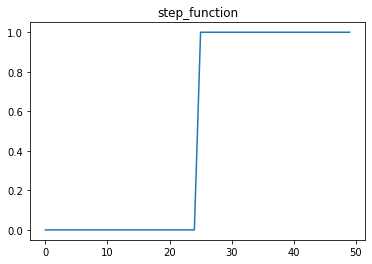

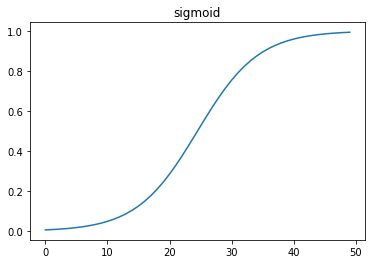

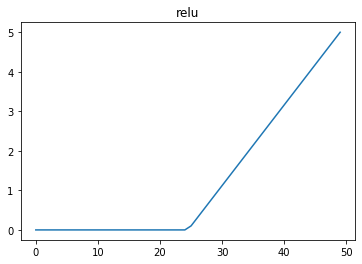

In [81]:
import matplotlib.pyplot as plt

plt.title('step_function')
plt.plot(step_function(x))
plt.show()

plt.title('sigmoid')
plt.plot(sigmoid(x))
plt.show()

plt.title('relu')
plt.plot(relu(x))
plt.show()

activation function을 구현하는 방법은 여러가지가 있다.  
코딩으로 직접 구현할 수 있는 능력이 필요하다.

In [83]:
def step_function2(x):
    return np.where(x<=0, 0, 1)

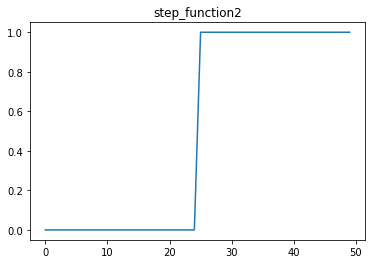

In [85]:
plt.title('step_function2')
plt.plot(step_function2(x))
plt.show()

In [84]:
def step_function3(x):
    return np.array(x>0, dtype=np.int)

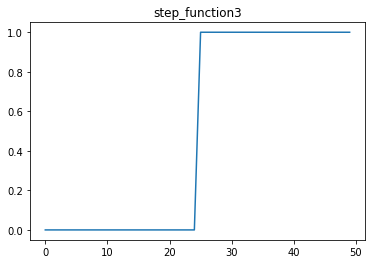

In [86]:
plt.title('step_function3')
plt.plot(step_function3(x))
plt.show()

activation function별로 차이를 한번에 비교해보자

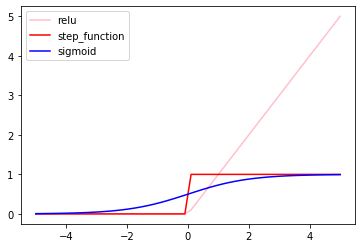

In [95]:
# state machine
# 한 셀에서 plot을 여러개 사용하면, 한 그래프 안에 다 그려진다.
plt.plot(x, ReLu(x), color='pink')
plt.plot(x, step_function3(x), color='red')
plt.plot(x, sigmoid(x), color='blue')
plt.legend(['relu', 'step_function', 'sigmoid'])